In [1]:
# load the functions
# required libraries: data.table (efficiency), foreach (parallel), sp, raster (distance calculations)
source('network_identity_cascades.R')

baseDir <- "/shared/0/projects/language-geography-abm/"
wkDir <- paste0(baseDir, "working-dir/")
sandiaDir <- paste0(wkDir, "sandia/")
setwd(sandiaDir) #change directory


Attaching package: ‘raster’


The following object is masked from ‘package:data.table’:

    shift




In [2]:
# define which identity variables go into the model

id_variables = list()

id_variables[["dist"]] = c('')
id_variables[["race"]] = c('race_white','race_black','race_american_indian','race_asian','race_native_hawaiian','race_hispanic')
id_variables[["lang"]] = c('lang_english','lang_spanish','lang_french','lang_chinese','lang_vietnamese','lang_tagalog')
id_variables[["pol"]] = c('pol_democrat','pol_republican','pol_other')
id_variables[["inc"]] = c('pov_level_below_pov_line','snap')
id_variables[["edu"]] = c('edu_none','edu_no_hs','edu_hs','edu_associates','edu_bachelors_plus')
id_variables[["lab"]] = c('labor_not_in_workforce','labor_employed','labor_unemployed','labor_armed_forces')

id_variables

$inc
[1] "pov_level_below_pov_line" "snap"                    

$edu
[1] "edu_none"           "edu_no_hs"          "edu_hs"            
[4] "edu_associates"     "edu_bachelors_plus"

$lab
[1] "labor_not_in_workforce" "labor_employed"         "labor_unemployed"      
[4] "labor_armed_forces"

In [3]:
# initialize the data and functions for the simulation
initialize_data_for_cascades(
    userFilename = "users.RDS",
    networkFilename = "edgelist.RDS",
    cascadeFilename = "init_characteristics.RDS",
    id_variables = id_variables
)

load_functions_and_trial_info()

2022-08-22 17:50:04 Read user dataframe

2022-08-22 17:51:00 Read edgelist dataframe

2022-08-22 17:51:54 Load cascade parameters

2022-08-22 17:51:54 Fix identity variables

2022-08-22 17:51:54 Get Baseline Distance Distribution for Quantile Calculation

2022-08-22 17:52:00 Calculate identity distribution quantiles



In [4]:
# dataframes and functions loaded into the environment 
ls()

[1] "baseDir"                       "cascades_info"                
 [3] "edgeList"                      "find_word_identity"           
 [5] "get_weights"                   "id_variables"                 
 [7] "id_variables_full"             "id_variables_sub"             
 [9] "initialize_data_for_cascades"  "load_functions_and_trial_info"
[11] "make_id_variables_full"        "make_id_variables_sub"        
[13] "qts"                           "sandiaDir"                    
[15] "simulate_cascade"              "update_edge_weights"          
[17] "update_prob"                   "users"                        
[19] "wkDir"

In [5]:
# what the input data looks like
print("user list")
head(users)
print("edge list")
head(edgeList)
print("cascade parameters")
cascades_info[sample(1:nrow(cascades_info),6),]

[1] "user list"


id,cong_fips,geo_fips_tract,state,lat,long,geo_fips,region,division,pov_level_below_pov_line,...,labor_armed_forces,edu_none,edu_associates,edu_no_hs,edu_hs,edu_bachelors_plus,degree,n_in,n_out,p_speak
100000129,3903,39049007209,OH,40.06381,-82.85918,39049,Midwest,East North Central,0.05043601,...,0,0.002900529,0.05937553,0.01109026,0.2209521,0.7056816,5,17,13,0.28332133
1000001371,3613,36061022301,NY,40.82018,-73.95427,36061,Northeast,Middle Atlantic,0.15658895,...,0,0.078956900,0.03784861,0.23180007,0.3449837,0.3064107,6,9,8,0.21972246
1000001760,1901,19013003001,IA,42.43352,-92.29310,19013,Midwest,West North Central,0.13406712,...,0,0.000000000,0.10069355,0.06986900,0.4628821,0.3665554,1,1,1,0.00000000
1000001940,0638,06037530102,CA,34.01032,-118.10838,06037,West,Pacific,0.17688630,...,0,0.015338263,0.09613804,0.29224870,0.4563133,0.1399617,2,2,8,0.06931472
1000002019,1304,13089023303,GA,33.73096,-84.07048,13089,South,South Atlantic,0.18704406,...,0,0.020094563,0.13735225,0.09243499,0.4971631,0.2529551,1,6,4,0.17917595
1000002632,0633,06037700802,CA,34.06769,-118.37605,06037,West,Pacific,0.11485489,...,0,0.002810743,0.06308557,0.02123673,0.3204247,0.5924422,1,2,2,0.06931472


[1] "edge list"


from,to,n_from,n_to,dist,inc_norm,lab_norm,edu_norm,weight,acc_inc_norm,acc_lab_norm,acc_edu_norm
100000129,22227719,2,3,169099.62,0.3551082,0.6259504,0.0000000,0.4128808,1,1,1
100000129,30738887,6,6,169598.57,0.4685478,0.8751358,0.3988273,1.0000000,1,1,1
100000129,341852344,1,2,123416.41,0.6943356,0.5355337,0.0000000,0.2195214,1,1,1
100000129,351419417,3,3,170784.21,0.3130916,0.8025163,0.3965905,0.5834341,1,1,1
100000129,748463803,1,3,169663.42,0.4685478,0.8751358,0.3988273,0.2195214,1,1,1
1000001371,144058680,1,1,15139.25,0.5241300,0.4507475,0.4582301,0.4128808,1,1,1


[1] "cascade parameters"


,var,id,word,inc,edu,lab,seed,stickiness
1091,"snap,labor_unemployed,edu_associates","1255953498,584425213,333613929,1573421324,378243951,294440730,321515583,296509399,142938793,466015859,419230823,612711797,562896137,762768217,874528644,588078053,456657624,255181287,327022334,705214974,255911016,3079731229,2220700151,855643512,29107121,467118142,777687954,413947713,450083890,177296512,330665014,730034173,343833355,824077848,59054066,304835182,301696747,349412152,410427539,250388720,198993543,151653251,157216464,1595939952,1629444446,452202694,2866993924,187677482,1144217215,466061541,231853179,156987986,2257285935,365739612,390991432,354693938,496977414,30981498,748294434,416798770,1611814940,62315599,187131502,420695967,1373085445,1702607252,589383927,1650610514,16895164,128719815,3497302874,498707981,60805419,22937798,607699025,2191322874,496662361,384039847,547301534,375385000,559924428,29471630,59309758,123109722,2357705343,586960709,38273917,209760489,1670593974,15973828,296434731,415620801,30995701,247132307,321609565,432958343,368408640,415756882,634254553,2738555745",1091,1,1,1,703539462,0.1
303,"pov_level_below_pov_line,snap,labor_unemployed","1041875653195444224,479568455,229697492,183725836,316845543,344376963,780670130,375842814,52631454,499275350,754559270,55852235,39496630,178820798,174052822,65050796,1466035232,393026502,2916717654,305181457,138848968,449245192,544803708,426431154,2155057562,244668173,146953753,729012860077117440,392230932,167010482,477980894,58004548,312571787,1275966674,325066369,263499801,183821756,2035621,2991900108,790490490,373399451,47014772,4186187472,637243778,841969639,20728091,190289212,463358109,111950159,305804210,20680864,1485424812,2605640251,305626709,604217465,754993,28481898,277182206,332401541,620511980,20187791,22941892,4086971419,150896221,543505075,894294193,168690231,74340588,293888991,1415295876,245872961,233435510,258232783,65433726,412944917,16870525,62014951,344492616,252235480,97022730,262071997,1198664156,160120568,461555103,259422602,251259896,178551566,1942880108,377778275,370278953,451183475,3011665520,525869731,2466934832,287793345,550549747,705925574,286528733,1014225672,1500232009",0303,1,0,1,380352447,0.3
2588,"labor_not_in_workforce,edu_none,edu_no_hs,edu_hs","1864842230,348220161,379789215,390907258,394319229,812589752,562446023,490080608,35660109,705754740,604263255,538552403,352799156,431100147,316136282,154696574,950916727,155425163,348385057,578241206,55054349,519033547,169619651,118106581,2740377934,354018990,2462256901,16961014,3282148178,1439664164,428813594,46975364,333628318,818871425993936896,228136795,477356946,748587188,2862966635,3227755723,584504230,1476514724,465331997,2203571484,80734956,408023671,53270354,2692462362,1571212422,4124434935,1358481954,1483083666,417585473,483984110,342430444,938196187,702364369959723008,1219920768,3314722512,863977429,1554863220,2335693423,21827315,16567058,46179659,437202442,3121957727,15403903,3258527948,102575427,3320482892,713846450,321119891,428404681,969204524,1697944776,2711684654,2958784903,18892043,2902053954,98985344,2448369606,122253285,1103976799,2305561296,928666676,1636125146,198557013,419147488,156586522,1167722390,2983379774,708259790,272999643,2896648259,1541505788,382443351,386262089,604943343,54438856,331817342",2588,0,1,1,468431716,0.8
1202,"pov_level_below_pov_line,labor_unemployed,edu_none,edu_no_hs","213139142,168311056,177283132,97079121,2258516408,1511281806,2165316656,1121238320,803103799,1338065108,58922003,181378716,1918615345,923374633,9637422,192008840,497477206,379581889,3012916160,478331403,599020830,585070094,69245594,35366285,33785214,203270753,2159932500,55301939,721861430,1064297635,1051994323,256415963,311277456,44901702,109588669,598115412,521021318,608041288,427610250,35172563,165125745,744464088,1108047078,851988708,88610724,310115514,227885891,1416849660,2217155701,578520696,534661864,168447640,67226412,95567937,195986824,347597248,609548028,873715238,26957764,193658835

In [ ]:
### code to test one simulation

#parameters
t(cascades_info[1,])

set.seed(2020)
message(paste(Sys.time(),"start runs"))

runs = sample(1:nrow(cascades_info)) #randomize order

for(run in runs[1:1]){
    try({
        setDTthreads(10)
        simulate_cascade(
             artifact = as.character(cascades_info$artifact[run]),
             adopters = unique(unlist(strsplit(cascades_info$id[run],","))),
             num_init_adopters = 10,
             stickiness_vector=cascades_info$stickiness[run], 
             p_decay_vector = 0.4, 
             theta_vector = 100,  
             quantile_cutoff = 0.85,
             numIterations = 100,
             seeds=cascades_info$seed[run],
             precompute_weights = T, 
             run = run,
             outdir = ''
        )
    })
}

,1
var,edu_associates
id,"394971643,26286907,90960383,157181366,580496966,2457199752,398123958,509276070,2303816438,1061800136,359561397,892324159,832243093,4619006538,1245244326,1058053950,480983967,504754378,753806430,913186820,599629471,19904317,744397591,26092308,533700020,2292197444,3144877273,2936264739,106923656,2286055089,96474483,605671073,343878281,445967713,421300446,476473300,1423471238,313048134,275767058,881187566,392233080,356922871,813414001,287880435,267759955,355885362,186264042,896544001,317164913,1463485513,4174870995,293844444,471734009,617355311,817669772,500220572,468751750,382235791,836878260,30763436,82177887,2187304320,137957732,324581887,158508614,410542074,529491859,44677667,1258205214,1621530186,3239430188,364709345,3556724356,1726497601,15824430,3165404207,920455826468429824,2430018644,18991646,59481866,380134796,318179886,414479778,22660190,1275986474,423932473,319311434,391834368,195208600,281345461,45684434,601548213,3319888217,390461833,515977268,814461668,257783646,404881755,572125182,2868357051"
word,0001
inc,0
edu,1
lab,0
seed,719984552
stickiness,0.1


2022-08-22 17:52:03 start runs

2022-08-22 17:52:03 Initialize network

2022-08-22 17:55:44 Run 1436  Adopters 10

-weight-inc1-edu0-lab1-p_decay0.4-thr100-S0.6

2022-08-22 17:55:52 start iterations

2022-08-22 17:56:56 decide who uses the new word

2022-08-22 17:56:56 update adopt list

2022-08-22 17:56:56 update exposure list

2022-08-22 17:56:56 update probability

2022-08-22 17:56:56 iteration done

2022-08-22 17:56:56 51 11315 1237

2022-08-22 17:57:37 decide who uses the new word

2022-08-22 17:57:37 update adopt list

2022-08-22 17:57:37 update exposure list

2022-08-22 17:57:38 update probability

2022-08-22 17:57:39 iteration done

2022-08-22 17:57:39 101 184842 23635

2022-08-22 18:04:50 decide who uses the new word

2022-08-22 18:04:50 update adopt list

2022-08-22 18:04:53 update exposure list

2022-08-22 18:04:56 update probability

2022-08-22 18:04:57 iteration done

2022-08-22 18:04:57 151 1280599 332870



In [ ]:
# run simulations for each set of parameters in the cascades_info dataframe

set.seed(2020)
message(paste(Sys.time(),"start runs"))

runs = sample(1:nrow(cascades_info)) #randomize order

### code for non-parallel simulations
#for(run in runs){

### code for parallel simulations
cl <- parallel::makeCluster(15, outfile="")
doParallel::registerDoParallel(cl, cores=15)
foreach(run=runs, .verbose=T, .packages=c("data.table", "sp", "raster")) %dopar% {
    try({
        setDTthreads(10)
        simulate_cascade(
             artifact = as.character(cascades_info$artifact[run]),
             adopters = unique(unlist(strsplit(cascades_info$id[run],","))),
             num_init_adopters = 10,
             stickiness_vector=cascades_info$stickiness[run], 
             p_decay_vector = 0.4, 
             theta_vector = 100,  
             quantile_cutoff = 0.85,
             numIterations = 100,
             seeds=cascades_info$seed[run],
             precompute_weights = T, 
             run = run,
             outdir = ''
        )
    })
}
parallel::stopCluster(cl) #shuts down parallel instances
message(paste(Sys.time(),"Done!"))

In [15]:
# one example of output data
# neigh = semi-colon delimited list of neighbors with edge weights
ts <- readRDS("ts--weight-inc1-edu0-lab1-p_decay0.4-thr100-S0.6-1586023134.RDS")
head(ts[grepl(";",ts$neigh),])

id,neigh,iteration
612219588,139557765:0.623539019422494;77762757:0.240096610464487,2
612219588,139557765:0.623539019422494;77762757:0.240096610464487,3
1202275658,3051752035:0.0590550326932383;3207962459:0.378309472912974,4
156130031,1250521584:0.106072199841351;279680697:0.15495664494124;395724518:0.0181139585911572;49718524:0.0423680259934809,5
635007125,3051752035:0.073546250139727;386604482:0.409287349223239,5
612219588,139557765:0.623539019422494;77762757:0.240096610464487,6


# VISUALIZE CASCADE CHARACTERISTICS

In [ ]:
library(tidyr)

In [76]:
files <- list.files(paste(wkDir, "exp-sandia2/", sep=""))
results <- data.frame(file = files[grepl("^exposed-",files)],
                      total_exposed=0, total_adopters=0, total_nonadopters=0,
                      total_exposures=0, total_uses=0, last_adopt=0)
nrow(results)
for(i in 1:nrow(results)){
    if(i %% 100 == 1) message(paste(Sys.time(),i))
    df <- readRDS(paste(wkDir, "exp-sandia2/", results$file[i], sep=""))
    results$total_exposed[i] <- nrow(df)
    results$total_adopters[i] <- sum(df$n_adopt>0)
    results$total_nonadopters[i] <- sum(df$n_adopt==0)
    results$total_exposures[i] <- sum(df$n_exposed, na.rm=T)
    results$total_uses[i] <- sum(df$n_adopt, na.rm=T)
    results$last_adopt[i] <- max(df$first_adopt, na.rm=T)
}
summary(df)

[1] 2660

2022-05-28 15:44:21 1

2022-05-28 15:44:51 101

2022-05-28 15:45:40 201

2022-05-28 15:46:44 301

2022-05-28 15:47:55 401

2022-05-28 15:49:49 501

2022-05-28 15:51:24 601

2022-05-28 15:52:55 701

2022-05-28 15:54:58 801

2022-05-28 15:56:38 901

2022-05-28 15:58:33 1001

2022-05-28 16:00:42 1101

2022-05-28 16:01:49 1201

2022-05-28 16:03:20 1301

2022-05-28 16:05:14 1401

2022-05-28 16:07:10 1501

2022-05-28 16:08:34 1601

2022-05-28 16:10:06 1701

2022-05-28 16:12:03 1801

2022-05-28 16:13:41 1901

2022-05-28 16:15:35 2001

2022-05-28 16:17:28 2101

2022-05-28 16:19:36 2201

2022-05-28 16:21:14 2301

2022-05-28 16:22:46 2401

2022-05-28 16:24:18 2501

2022-05-28 16:25:51 2601



      id                 by                  p             first_exposed   
 Length:2512872     Length:2512872     Min.   :0.0000000   Min.   :  0.00  
 Class :character   Class :character   1st Qu.:0.0000000   1st Qu.: 79.00  
 Mode  :character   Mode  :character   Median :0.0000000   Median : 92.00  
                                       Mean   :0.0050264   Mean   : 97.05  
                                       3rd Qu.:0.0000026   3rd Qu.:109.00  
                                       Max.   :0.9997533   Max.   :219.00  
                                                                           
   n_exposed        first_adopt        n_adopt        adjustment_w   
 Min.   :   1.00   Min.   :  1.0    Min.   : 0.000   Min.   :0.0000  
 1st Qu.:   5.00   1st Qu.: 96.0    1st Qu.: 0.000   1st Qu.:0.5438  
 Median :  13.00   Median :113.0    Median : 2.000   Median :0.6263  
 Mean   :  21.04   Mean   :118.5    Mean   : 3.261   Mean   :0.6562  
 3rd Qu.:  28.00   3rd Qu.:136.0    3rd Qu

In [78]:
summary(results)

                                                                    file     
 exposed-0001-weight-inc0-edu1-lab0-p_decay0.4-S0.1-2290-719984552.RDS:   1  
 exposed-0002-weight-inc0-edu1-lab0-p_decay0.4-S0.2-2318-367186105.RDS:   1  
 exposed-0003-weight-inc0-edu1-lab0-p_decay0.4-S0.3-1695-825111923.RDS:   1  
 exposed-0004-weight-inc0-edu1-lab0-p_decay0.4-S0.4-1455-124046658.RDS:   1  
 exposed-0005-weight-inc0-edu1-lab0-p_decay0.4-S0.5-578-1436164271.RDS:   1  
 exposed-0006-weight-inc0-edu1-lab0-p_decay0.4-S0.6-669-1641606953.RDS:   1  
 (Other)                                                              :2654  
 total_exposed       total_adopters    total_nonadopters   total_exposures   
 Min.   :     44.0   Min.   :     10   Min.   :     30.0   Min.   :      99  
 1st Qu.:    306.0   1st Qu.:     33   1st Qu.:    273.8   1st Qu.:     771  
 Median :    934.5   Median :     99   Median :    838.5   Median :    1968  
 Mean   : 562381.6   Mean   : 330518   Mean   : 231863.3   Mean 

In [88]:
table(results$total_uses>1000)


FALSE  TRUE 
 1818   842 

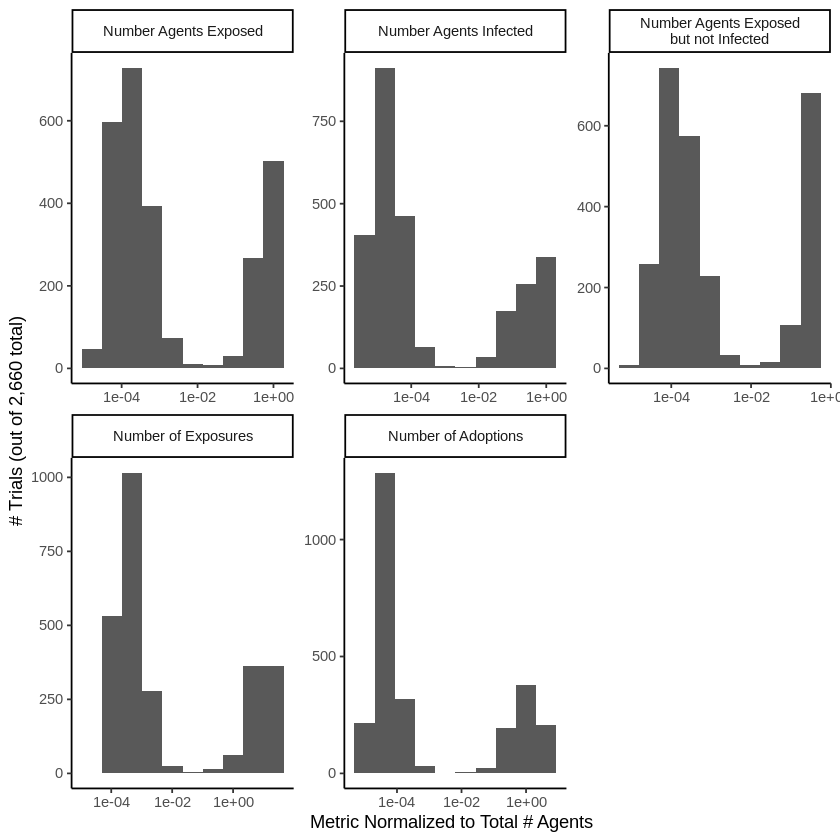

In [97]:
ggplot(results %>% 
       rename(`Number Agents Exposed`=total_exposed,
              `Number Agents Infected`=total_adopters,
              `Number Agents Exposed\nbut not Infected`=total_nonadopters,
              `Number of Exposures`=total_exposures,
              `Number of Adoptions`=total_uses) %>%
       pivot_longer(cols=`Number Agents Exposed`:`Number of Adoptions`,
                    names_to="Metric",
                    values_to="Value") %>%
       mutate(Metric=factor(Metric, levels=unique(Metric))), 
       aes(x=Value/nrow(users))) +
geom_histogram(bins=10) +
facet_wrap(~Metric, ncol=3,scales="free") +
scale_x_continuous(trans="log10") +
labs(x="Metric Normalized to Total # Agents", y="# Trials (out of 2,660 total)") +
theme_classic()